<a href="https://colab.research.google.com/github/agussazali/agussazali.github.io/blob/main/Customer_Profile_Analysis_Understanding_Churn_Patterns_in_Banking_Services.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Description: In this project, I will conduct an analysis of customers who have churned in banking services. I will execute a series of steps to gain a deeper understanding of the profile of customers who discontinue their usage of the services, with a focus on several key aspects. The steps I will undertake include:

1. "Calculating the Number of Churned Customers Based on Gender:
I will identify the number of churned customers based on their gender. This initial analysis will provide an overview of the differences in the number of male and female customers who decide to discontinue using banking services.

2. Calculating Churn Rate:
Next, I will calculate the overall churn rate. By dividing the number of churned customers by the total number of customers, I can obtain the percentage churn rate. This will provide insights into the proportion of customers who have churned within my dataset.

3. Geographic Analysis: Identifying the Top 3 Countries with the Highest Churn Rates:
I will perform a geographic analysis by examining the 'Geography' attribute in the dataset. I will identify the top 3 countries with the highest churn rates. This analysis will offer insights into geographical regions that might have contributing factors to their high churn rates.

4. Age Distribution of Churned Customers:
Lastly, I will explore the age distribution of churned customers. Using a histogram, I will visualize the age distribution of customers who have discontinued using the service. This will help me identify age groups that are more susceptible to churn and understand factors that might influence their decision to churn.

Through this analysis, my goal is to gain a better understanding of the profile of customers who churn from banking services. This information can assist the bank in identifying the causes of churn, developing more effective retention strategies, and enhancing service quality and customer satisfaction."




Pertama Kita akan mengimpor data yang saya ambil dari Kaggle.com dataset yang saya gunakan adalah Churn_Modelling.csv. data tersebut dapat didownload pada link berikut https://www.kaggle.com/datasets/adammaus/predicting-churn-for-bank-customers/code?resource=download

In [ ]:
from google.colab import files

uploaded = files.upload()

# Untuk membaca file CSV yang diunggah
import pandas as pd

df = pd.read_csv('Churn_Modelling.csv')


Saving Churn_Modelling.csv to Churn_Modelling.csv


In [ ]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
#untuk mengetahui informasi dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


From the above dataset, it can be observed that there are 10,000 rows and 14 columns with various data types, including integers, text, and decimal numbers. Furthermore, it is important to note that there are no missing values present in this dataset.

In [ ]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
# Membaca dataset dari file atau sumber data lainnya
dataset = pd.read_csv("Churn_Modelling.csv")
# Menghitung jumlah pelanggan yang telah exited
jumlah_exited = len(dataset[dataset['Exited'] == 1])

# Menampilkan hasil
print("Jumlah pelanggan yang telah exited: ", jumlah_exited)

Jumlah pelanggan yang telah exited:  2037


"Based on the information provided earlier, out of the 10,000 customers, 2,037 customers have churned. Next, we will calculate the total churn rate by dividing the number of churned customers by the total number of customers."

In [ ]:
import pandas as pd

# Membaca data dari file atau sumber data lainnya
data = pd.read_csv("Churn_Modelling.csv")  #
# Menghitung total jumlah pelanggan yang telah keluar (churned)
total_churned = data[data['Exited'] == 1]['Exited'].count()

# Menghitung total jumlah pelanggan keseluruhan
total_customers = data['Exited'].count()

# Menghitung churn rate
churn_rate = total_churned / total_customers

print("Total Churned Customers:", total_churned)
print("Total Customers:", total_customers)
print("Churn Rate:", churn_rate)


Total Churned Customers: 2037
Total Customers: 10000
Churn Rate: 0.2037


"It can be observed that the churn rate is approximately 0.2037 or, when expressed in percentage, around 20.3%. A high churn rate like this indicates challenges in customer retention. A high churn rate can have negative implications on revenue and business growth, as efforts to acquire new customers might be more costly than retaining existing ones. To determine the causes of this high churn rate, we can conduct a customer profile analysis. By understanding the customer profile, we can identify patterns or trends that may contribute to the high churn rate, enabling us to take appropriate steps to reduce it."



"The first analysis we will conduct is to examine the number of male and female customers and categorize them based on churn rate using a pie chart."

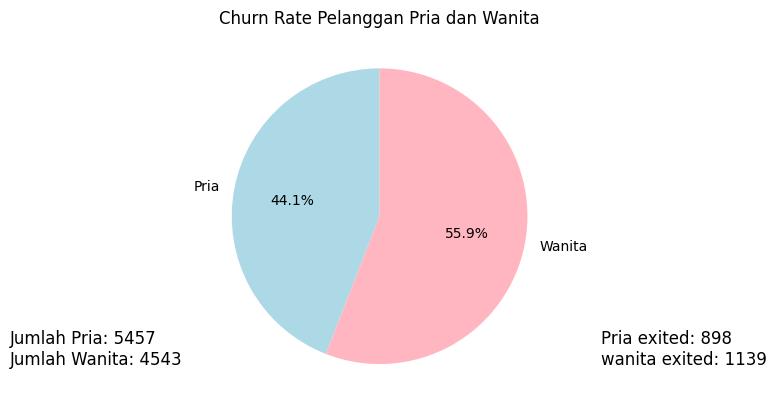

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
data = pd.read_csv('Churn_Modelling.csv')

# Menghitung jumlah pelanggan pria dan wanita
jumlah_pria = len(data[data['Gender'] == 'Male'])
jumlah_wanita = len(data[data['Gender'] == 'Female'])

# Menghitung jumlah pelanggan pria dan wanita yang telah exited
pria_exited = len(data[(data['Gender'] == 'Male') & (data['Exited'] == 1)])
wanita_exited = len(data[(data['Gender'] == 'Female') & (data['Exited'] == 1)])

# Data untuk Pie Chart
churn_rate = [pria_exited, wanita_exited]
total_pelanggan = [jumlah_pria, jumlah_wanita]

# Label untuk Pie Chart
labels = ['Pria', 'Wanita']

# Warna untuk Pie Chart
colors = ['lightblue', 'lightpink']

# Plotting Pie Chart
plt.pie(churn_rate, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Churn Rate Pelanggan Pria dan Wanita')

# Menampilkan jumlah pelanggan di bawah Pie Chart
plt.text(-2.5, -1, f"Jumlah Pria: {jumlah_pria}\nJumlah Wanita: {jumlah_wanita}", fontsize=12)

# Menampilkan jumlah pelanggan exited di bawah Pie Chart
plt.text(1.5, -1, f"Pria exited: {pria_exited}\nwanita exited: {wanita_exited}", fontsize=12)

# Menampilkan grafik
plt.show()


"There are 898 male customers and 1,139 female customers who have churned out of a total of 5,457 male customers and 4,543 female customers.

There are several factors that may contribute to the higher churn rate among female customers. Some of these factors include:

1. Life Changes: Women often face significant life changes such as marriage, childbirth, or career management that can impact their financial needs and preferences for banking services. Mismatch between their needs and the services provided by the bank can lead female customers to seek more suitable alternatives.

2. Customer Service: Unsatisfactory customer service or lack of attention to the specific needs of female customers can contribute to a higher churn rate. If female customers feel undervalued or do not receive adequate support from the bank, they may be inclined to look for more responsive banking services that prioritize customer satisfaction.

3. Preferences and Competitor Offerings: Competition in the banking industry can lead to attractive offerings from competing banks specifically targeted at female customers. More favorable product or service offerings from competitors can incentivize female customers to switch and leave their current bank.

In addressing the high churn rate among female customers, it is important for the bank to conduct further analysis and identify underlying causes. This can be achieved through customer satisfaction surveys, consumer behavior analysis, or direct interactions with female customers to gain a deeper understanding of their needs, expectations, and preferences.

With a better understanding of the factors influencing churn rate among female customers, the bank can adopt more effective strategies to retain customers, enhance service quality, and create a more satisfying experience for female customers."

"Furthermore, we will conduct a geographical (origin) analysis of churned customers to gain insights and patterns. This will enable the bank to take appropriate actions to reduce the high churn rate."

<Figure size 1000x600 with 0 Axes>

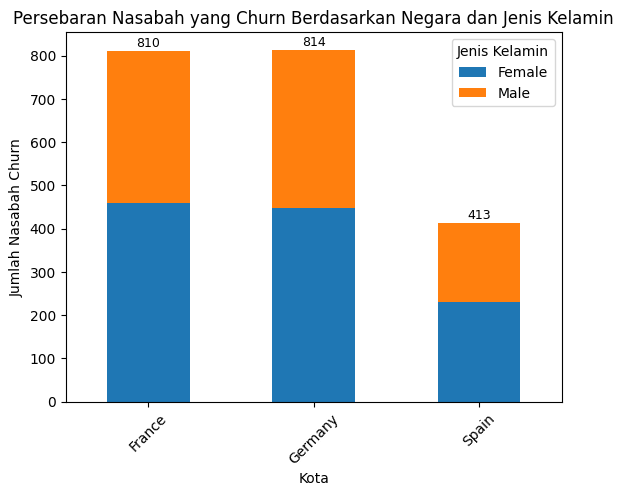

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
data = pd.read_csv('Churn_Modelling.csv')

# Filter data hanya untuk nasabah yang churn
data_churn = data[data['Exited'] == 1]

# Hitung jumlah nasabah yang churn per kota dan jenis kelamin
nasabah_churn_per_kota_gender = data_churn.groupby(['Geography', 'Gender']).size().unstack()

# Hitung total nasabah yang churn per kota
nasabah_churn_per_kota = nasabah_churn_per_kota_gender.sum(axis=1)

# Plot stacked bar chart
plt.figure(figsize=(10, 6))
nasabah_churn_per_kota_gender.plot(kind='bar', stacked=True)
plt.title('Persebaran Nasabah yang Churn Berdasarkan Negara dan Jenis Kelamin')
plt.xlabel('Kota')
plt.ylabel('Jumlah Nasabah Churn')
plt.xticks(rotation=45)
plt.legend(title='Jenis Kelamin')

# Menambahkan teks total nasabah churn per kota
for i, value in enumerate(nasabah_churn_per_kota):
    plt.text(i, value + 10, str(value), ha='center', fontsize=9)

plt.show()




"This information provides an initial overview of the factors that can influence churn rates in the banking industry.

From the analysis of customer churn distribution in the top three countries with the highest churn rates, namely Germany, France, and Spain, we can observe several interesting findings.

Firstly, the number of churned customers in Germany is 814, followed by France with 810 customers, and Spain with 413 customers. This indicates that the churn rate is higher in Germany and France compared to Spain.

Secondly, when we consider the gender of churned customers, it is evident that the number of female customers who have churned dominates over the number of male customers. This suggests a tendency that female customers are more likely to discontinue using banking services compared to male customers in these three countries."



"Next, we will examine the age distribution of churned customers. Analyzing the age distribution of churned customers is crucial as age can be a significant factor in a customer's decision to discontinue using banking services. By understanding the patterns and trends of age among churned customers, the bank can identify age segments that are more susceptible to churn and take appropriate measures to reduce the churn rate."

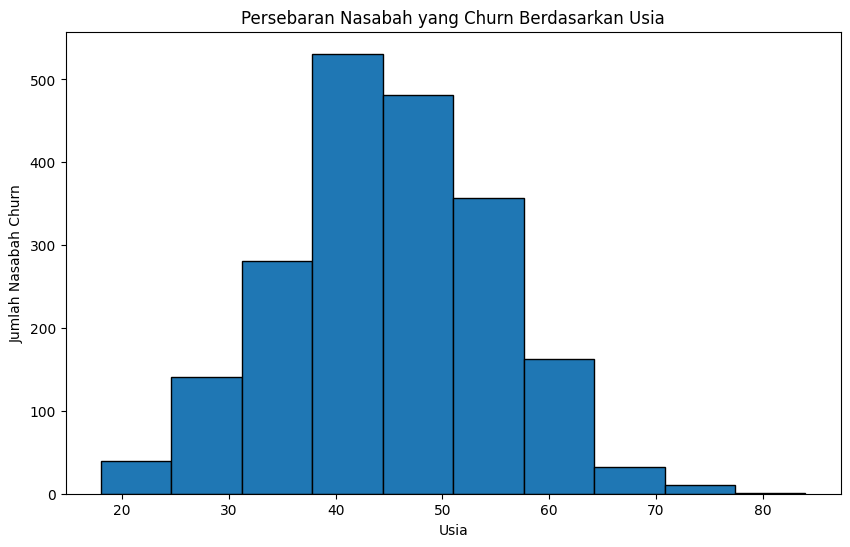

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
data = pd.read_csv('Churn_Modelling.csv')

# Filter data hanya untuk nasabah yang churn
data_churn = data[data['Exited'] == 1]

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(data_churn['Age'], bins=10, edgecolor='black')
plt.title('Persebaran Nasabah yang Churn Berdasarkan Usia')
plt.xlabel('Usia')
plt.ylabel('Jumlah Nasabah Churn')

plt.show()


"In the analysis of customer churn distribution based on age, the histogram indicates that the age group between 40 to 50 years has a significantly high number of churned customers. This suggests that this age range is prone to a tendency to discontinue using banking services.

It is important to pay attention to this age group as there are several factors that may contribute to the high churn rate within this range. Some factors that might influence customer decisions in this age group include:

1. Life Changes: The age range of 40 to 50 years often signifies a period of transition in an individual's life, such as marriage, divorce, job relocation, or retirement planning. These changes can impact the customer's banking service needs and preferences, which in turn may lead to the decision to discontinue services.

2. Market Competition: This age range is often a target market segment heavily contested in the banking industry. Intense competition to acquire customers within this age group can lead to compelling offers from competing banks, prompting customers to switch to more favorable banking services.

3. Increased Service Needs: The age group of 40 to 50 years is also associated with increased banking service needs, such as home loans, investments, or financial planning. If customers feel that their needs are not adequately met by the bank, they may opt to seek alternatives that better suit their requirements.

With the consideration of the high churn rate within the 40 to 50 age group, the bank can take appropriate actions to enhance customer retention within this segment. This may involve offering products and services tailored to their needs, improving personalized customer service, or launching targeted retention campaigns aimed specifically at customers within this age group.

With a deep understanding of the factors influencing churn rate within a specific age group, the bank can optimize marketing strategies, product development, and services tailored to maintain customer satisfaction and reduce churn rates within this age group susceptible to churn."